<a href="https://colab.research.google.com/github/koushik2299/Item-Store-Sale-Prediction-/blob/main/EDA%2BModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
! pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
df=pd.read_csv("/content/Train.csv")

# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to better understand the data and identify patterns, trends, and outliers. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.groupby('Item_Type').agg({'Item_Weight':'mean'})

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [8]:
df.Item_Weight.mean()

12.857645184135976

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing Values

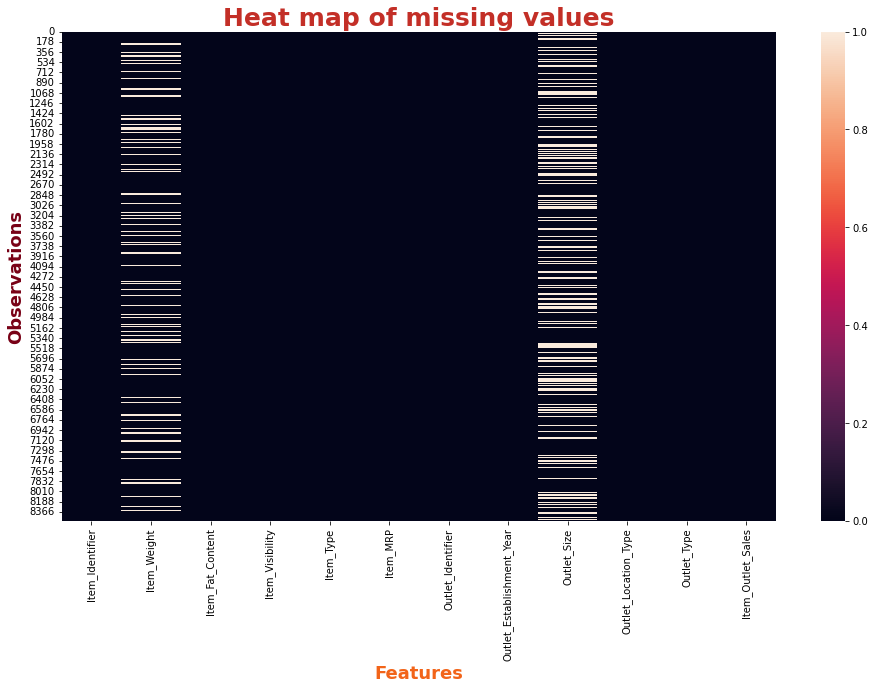

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())

plt.xlabel("Features",size=18,color="#f26419",fontweight="bold")
plt.ylabel("Observations",size=18,color="#780116",fontweight="bold")
plt.title("Heat map of missing values",size=25,fontweight="bold",color="#c32f27")
plt.show()

In [11]:
missing_value_percentage=pd.DataFrame(df.isna().sum()*100/8523)

In [12]:
missing_value_percentage.reset_index(level=0,inplace=True)

In [13]:
missing_value_percentage.columns=["Features","Percentage_of_NA"]
missing_value_percentage

,Features,Percentage_of_NA
0,Item_Identifier,0.000000
1,Item_Weight,17.165317
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.276428
9,Outlet_Location_Type,0.000000


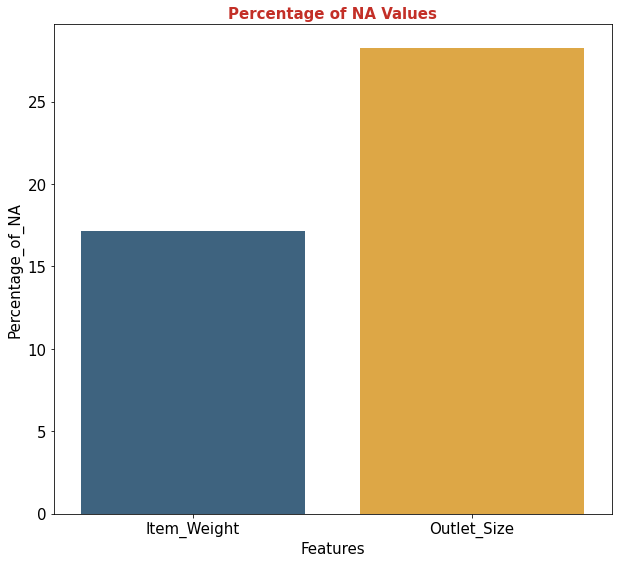

In [14]:
plt.figure(figsize=(10,9))
sns.barplot(x="Features",y="Percentage_of_NA",data=missing_value_percentage[missing_value_percentage["Percentage_of_NA"]>0],palette=['#33658a','#f6ae2d'])
plt.xlabel("Features",size=15)
plt.ylabel("Percentage_of_NA",size=15)
plt.title("Percentage of NA Values",size=15,fontweight="bold",color="#c32f27")
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [15]:
df1=df

Assuming Outlet type and Outlet Size are correlated based on domain knowledge. 
Lets see the corealtion by uing contigency matrix 

In [16]:
# Create a contingency table of Outlet Type and Outlet Size
contingency_table = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], margins=True)

# Print the contingency table
print(contingency_table)

Outlet_Size        High  Medium  Small   All
Outlet_Type                                 
Grocery Store         0       0    528   528
Supermarket Type1   932     930   1860  3722
Supermarket Type2     0     928      0   928
Supermarket Type3     0     935      0   935
All                 932    2793   2388  6113


In [17]:
# Calculate the percentage of each Outlet Type that falls into each Outlet Size category
outlet_type_size_pct = contingency_table.div(contingency_table['All'], axis=0).iloc[:-1, :-1]

# Print the percentage table
print(outlet_type_size_pct)

Outlet_Size            High    Medium     Small
Outlet_Type                                    
Grocery Store      0.000000  0.000000  1.000000
Supermarket Type1  0.250403  0.249866  0.499731
Supermarket Type2  0.000000  1.000000  0.000000
Supermarket Type3  0.000000  1.000000  0.000000


In [18]:
# Impute missing Outlet Size values based on the percentage table
for idx, row in df[df['Outlet_Size'].isnull()].iterrows():
    outlet_type = row['Outlet_Type']
    outlet_size = outlet_type_size_pct.loc[outlet_type].idxmax()
    df1.loc[idx, 'Outlet_Size'] = outlet_size

In [19]:
grouped = df1.groupby("Item_Type")
item_type_mean = grouped["Item_Weight"].mean()

print(item_type_mean)

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64


In [20]:
df1.groupby("Item_Type").agg({'Item_Weight':'mean'})

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [21]:
grouped = df.groupby('Item_Type')['Item_Weight'].mean()

# Loop through each group and impute the missing values with the mean value of the group
for item_type, mean_weight in grouped.iteritems():
    df1.loc[df['Item_Type'] == item_type, 'Item_Weight'] = df1.loc[df['Item_Type'] == item_type, 'Item_Weight'].fillna(mean_weight)


In [22]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Visualisations

Corelational Analysis

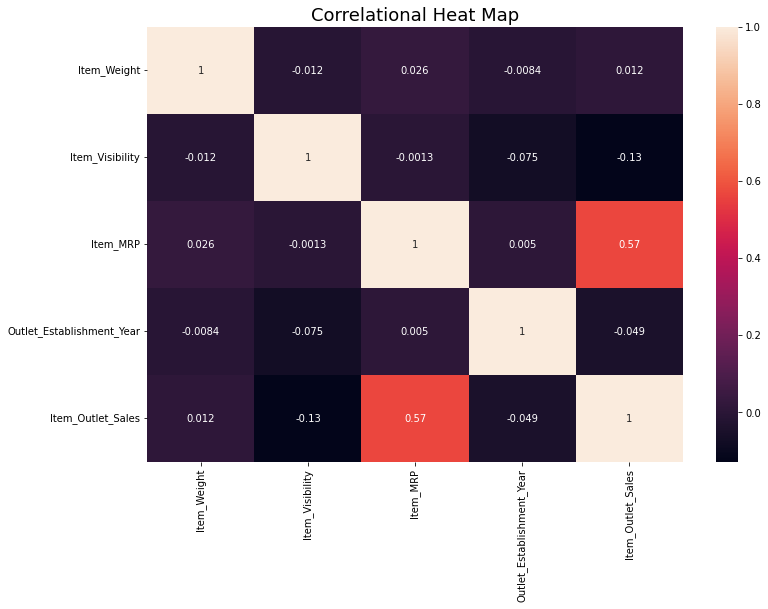

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.title("Correlational Heat Map",size=18)
plt.show()

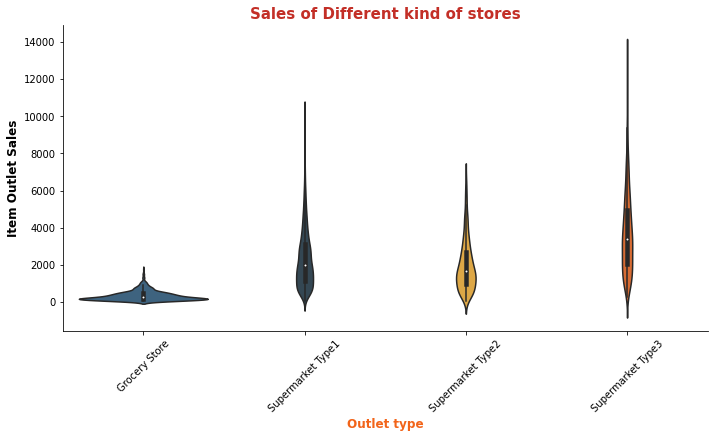

In [24]:
custom_palette = sns.color_palette(['#33658a', '#2f4858', '#f6ae2d','#f26419'])
sns.catplot(data=df, x="Outlet_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Grocery Store","Supermarket Type1","Supermarket Type2","Supermarket Type3"],palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#f26419",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

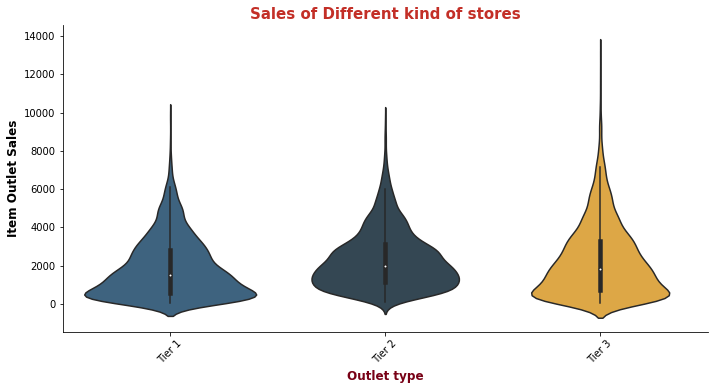

In [25]:
from pandas._libs.algos import pad_inplace
sns.catplot(data=df, x="Outlet_Location_Type", y="Item_Outlet_Sales",kind="violin",height=5, aspect=2,order=["Tier 1", "Tier 2","Tier 3"],palette=custom_palette)
plt.title("Sales of Different kind of stores",size=15,fontweight="bold",color="#c32f27")
plt.xlabel("Outlet type",size=12,color="#780116",fontweight="bold")
plt.ylabel("Item Outlet Sales",size=12,fontweight="bold")
plt.xticks(rotation=45)
plt.show()

Store which are present in **Tier 3** have more sales than Tier 1 and Tier 2

**Distributions of Numerical Features**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


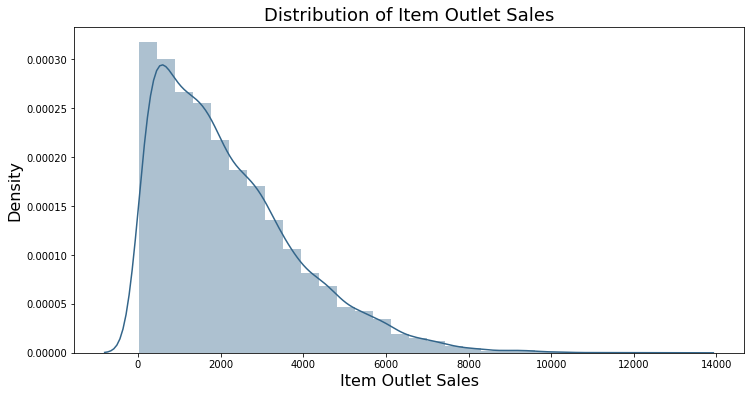

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_Outlet_Sales'], color='#33658a', bins=30, kde=True)
plt.xlabel('Item Outlet Sales',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item Outlet Sales',size=18)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


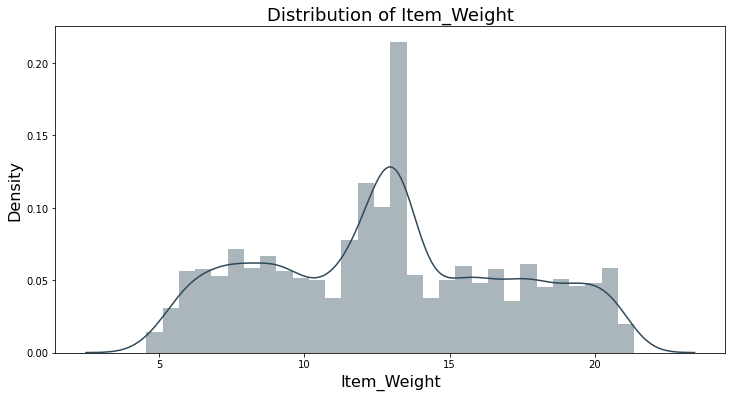

In [27]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_Weight'], color='#2f4858', bins=30, kde=True)
plt.xlabel('Item_Weight',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_Weight',size=18)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


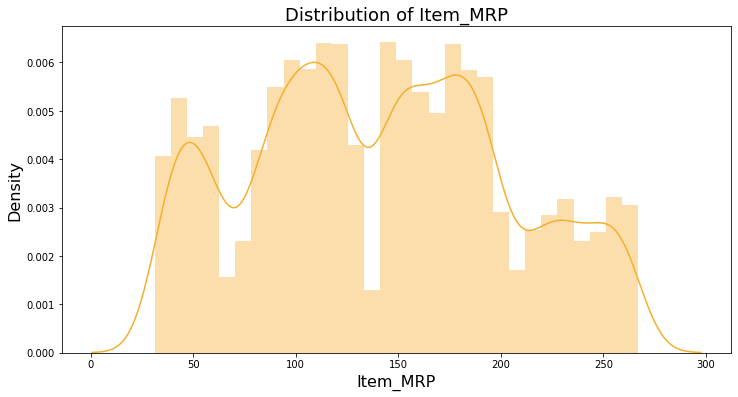

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_MRP'], color='#f6ae2d', bins=30, kde=True)
plt.xlabel('Item_MRP',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item_MRP',size=18)
plt.show()

Lets see if there is any impact on sales on basis of Outlet Establisment Year

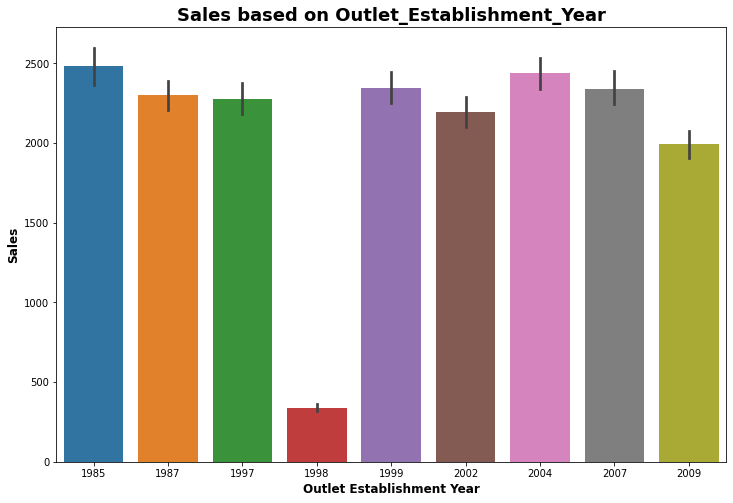

In [29]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=df1,x="Outlet_Establishment_Year",y="Item_Outlet_Sales")
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

Seems like every year is having similar Sales except 1998, Lets find out why

In [30]:
df1["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Heres the reason why clearly the 1998 records are low. From this we can infer that theres is some difference in number of columns to aviod this lets take mean of the years

In [31]:
est_sales = df1.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
est_sales

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

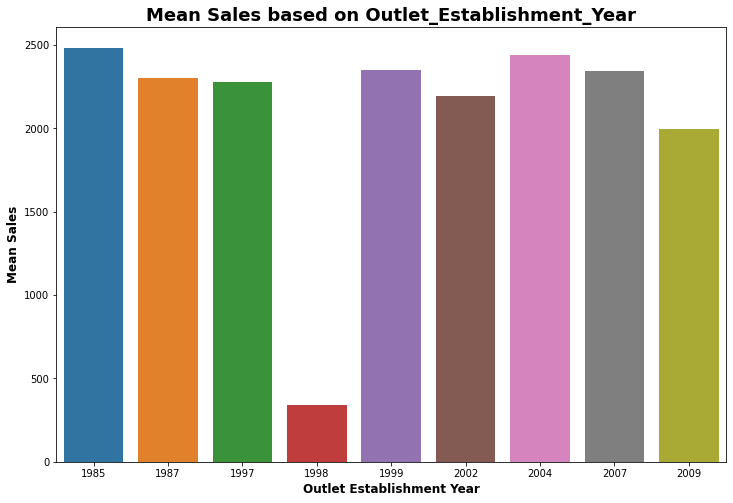

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('Mean Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
est_sales = df1.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
sns.barplot(x=est_sales.index, y=est_sales.values)
plt.xlabel("Outlet Establishment Year",size=12,fontweight="bold")
plt.ylabel("Mean Sales",size=12,fontweight="bold")
plt.show()

Even we took mean into consideration the average is less. So, based on this the stroes which got established in 1998 are less in sales

## Dealing with Categorical Variables


In [33]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
df1.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [35]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

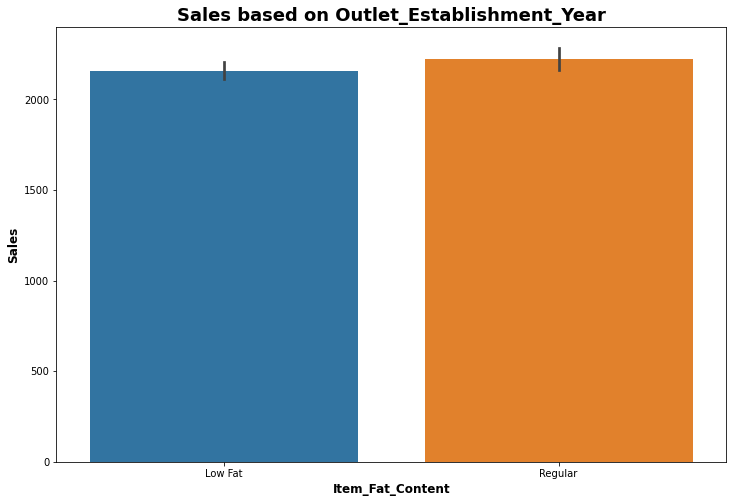

In [36]:
plt.figure(figsize=(12,8))
plt.title('Sales based on Outlet_Establishment_Year',size=18,fontweight="bold")
sns.barplot(data=df1,x="Item_Fat_Content",y="Item_Outlet_Sales")
plt.xlabel("Item_Fat_Content",size=12,fontweight="bold")
plt.ylabel("Sales",size=12,fontweight="bold")
plt.show()

**Label Encoding**

Label encoding is an important technique in data preprocessing, especially for categorical data. It involves converting categorical values into numeric labels that can be easily processed by machine learning models.

In [37]:
encoder = LabelEncoder()

In [38]:
df1['Item_Identifier'] = encoder.fit_transform(df1['Item_Identifier'])

df1['Item_Fat_Content'] = encoder.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type'] = encoder.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier'] = encoder.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size'] = encoder.fit_transform(df1['Outlet_Size'])

df1['Outlet_Location_Type'] = encoder.fit_transform(df1['Outlet_Location_Type'])

df1['Outlet_Type'] = encoder.fit_transform(df1['Outlet_Type'])

In [39]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Modelling before Feature Engineering

In [40]:
df1.columns.difference(["Item_Outlet_Sales"])

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')

In [41]:
X=df1[df1.columns.difference(["Item_Outlet_Sales"])]
y=df1["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [43]:
#pip install lazypredict

#from lazypredict.Supervised import LazyRegressor

#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
#models, predictions = reg.fit(X_train, X_test, y_train, y_test)

#print(models)

In [44]:
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

In [52]:
# X_train, X_test, y_train, y_test
#Making list to append scores in the Metrics for Regression
R2_score = []
Score_Train=[]
Score_Test=[]
RMSE = []
MAE=[]
Error=[]
MSE=[]
mean=[]
std=[]
    
#Making ditonary to plot bar graph
# R2_score_df=()
R2_score_dict = {}
RMSE_score_dict = {}
MAE_score_dict = {}
MSE_score_dict={}
Score_Train__dict={}
Score_Test__dict={}
Cross_Valication_score_dict={}

for i in regg_models:    
    train_model = i.fit(X_train, y_train)
    y_pred = train_model.predict(X_test)
    # score = train_model.score(X_test, y_test)
    # r2_score.append(score)
    #R2Score
    r2score=metrics.r2_score(y_test,y_pred) # (coefficient of determination) regression score function
    R2_score.append(r2score)
    #Score training dataset
    scoretrain=train_model.score(X_train,y_train)
    Score_Train.append(scoretrain)
    #Score training dataset
    scoretest=train_model.score(X_test,y_test)
    Score_Test.append(scoretest)
    
    #Normaized RMSE
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))/(max(y)-min(y))
    RMSE.append(rmse)   
    #MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    MSE.append(mse)   
    #MAE
    mae=metrics.mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    #Cross validation score
    cvs=cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))
    #Error
    # errr = [((y_pred[i]-y_test[i])/(y_test[i])) for i in range(0,len(y_test))]
    # errr = [((y_prediction[i]-actual[i])/(actual[i])) for i in range(0,len(y_test))]
    # Error.append(errr)    



print("                                         Training Data \n","="*100)
print("           r2_score \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',R2_score[i])
    R2_score_dict.update({regg_models[i].__class__.__name__: R2_score[i]})

print('-'*60,'\n')

print("            Score Train \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Train[i])
    Score_Train__dict.update({regg_models[i].__class__.__name__:Score_Train[i]})

print('-'*60,'\n')

print("            Score Test \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Test[i])
    Score_Test__dict.update({regg_models[i].__class__.__name__:Score_Test[i]})
    
print('-'*60,'\n')

print("            Normalized RMSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',RMSE[i])
    RMSE_score_dict.update({regg_models[i].__class__.__name__:RMSE[i]})

print('-'*60,'\n')

print("            MSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MSE[i])
    MSE_score_dict.update({regg_models[i].__class__.__name__:MSE[i]})

print('-'*60,'\n')


print("            MAE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MAE[i])
    MAE_score_dict.update({regg_models[i].__class__.__name__ :MAE[i]})


print('-'*60,'\n')


print('________________Cross Validation Score________________ \n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',mean[i])
    Cross_Valication_score_dict.update({regg_models[i].__class__.__name__ :mean[i]})

# print('-'*60,'\n')

# print("            Error \n")
# for i in range(len(regg_models)):
#     print(regg_models[i].__class__.__name__ ,':',Error[i])



                                         Training Data 
           r2_score 

LinearRegression : 0.5200986997195332
Lasso : 0.5205558890666568
Ridge : 0.5202317450431948
SVR : -0.027003016183985817
RandomForestRegressor : 0.5601874422018442
DecisionTreeRegressor : 0.18375592804096674
XGBRegressor : 0.5414250582543656
------------------------------------------------------------ 

            Score Train 

LinearRegression : 0.4994265133008352
Lasso : 0.49928645832681495
Ridge : 0.4994184425781145
SVR : -0.04933181589905722
RandomForestRegressor : 0.9377496384836083
DecisionTreeRegressor : 1.0
XGBRegressor : 0.8619101177061006
------------------------------------------------------------ 

            Score Test 

LinearRegression : 0.5200986997195332
Lasso : 0.5205558890666568
Ridge : 0.5202317450431948
SVR : -0.027003016183985817
RandomForestRegressor : 0.5601874422018442
DecisionTreeRegressor : 0.18375592804096674
XGBRegressor : 0.5414250582543656
--------------------------------------

In [46]:
R2_score_dict

{'LinearRegression': 0.5200986997195332,
 'Lasso': 0.5205558890666568,
 'Ridge': 0.5202317450431948,
 'SVR': -0.027003016183985817,
 'RandomForestRegressor': 0.5536767620351848,
 'DecisionTreeRegressor': 0.1791942437568539,
 'XGBRegressor': 0.5414250582543656}

In [47]:
R2_score_dict.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'SVR', 'RandomForestRegressor', 'DecisionTreeRegressor', 'XGBRegressor'])

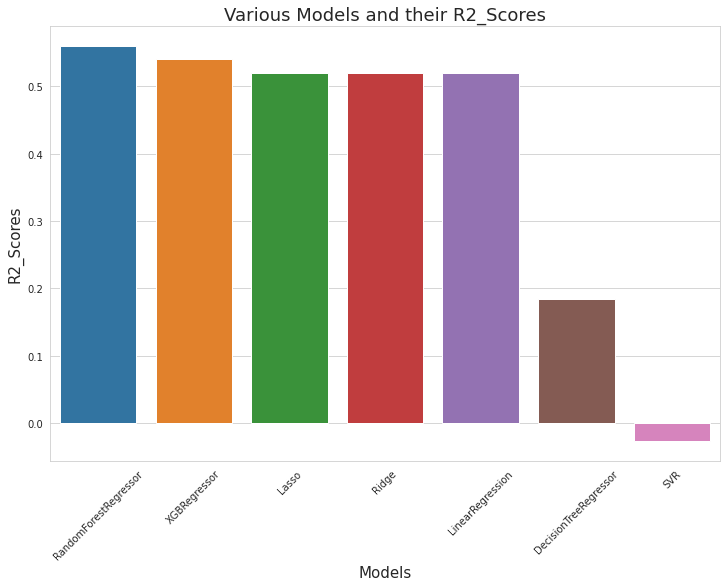

In [53]:
#R2 Scores
sorted_keys = sorted(R2_score_dict, key=R2_score_dict.get, reverse=True)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x=list(R2_score_dict.keys()), y=list(R2_score_dict.values()), order=sorted_keys)
plt.xticks(rotation=45)
plt.xlabel("Models",size=15)
plt.ylabel("R2_Scores",size=15)
plt.title("Various Models and their R2_Scores",size=18)

plt.show()

If we consider R2 Score as a metric we can clearly infer that Random Forest Regressor is working better than other models 
 

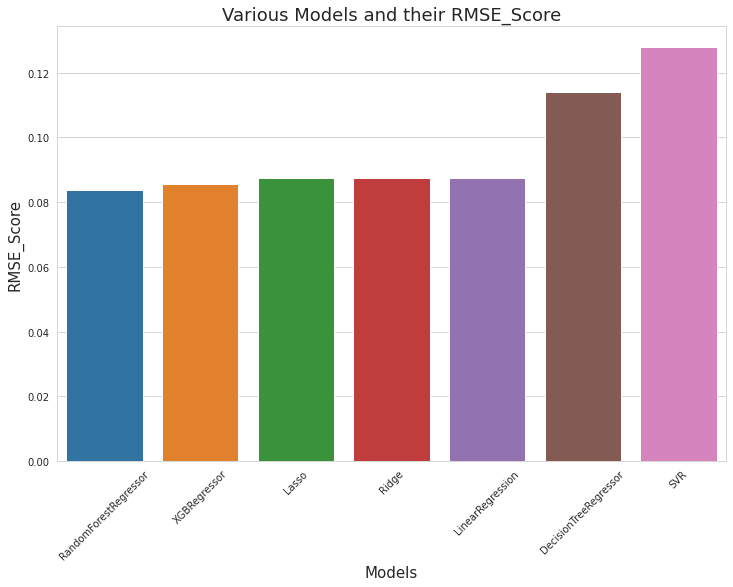

In [54]:
#RMSE
sorted_keys = sorted(RMSE_score_dict, key=RMSE_score_dict.get, reverse=False)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax=sns.barplot(x=list(RMSE_score_dict.keys()), y=list(RMSE_score_dict.values()), order=sorted_keys)
plt.xticks(rotation=45)
plt.xlabel("Models",size=15)
plt.ylabel("RMSE_Score",size=15)
plt.title("Various Models and their RMSE_Score",size=18)

plt.show()

In [55]:
Cross_Valication_score_dict

{'LinearRegression': 0.5014659246566111,
 'Lasso': 0.5013263921264091,
 'Ridge': 0.5014697526956432,
 'SVR': -0.04863366111175012,
 'RandomForestRegressor': 0.5496722203647428,
 'DecisionTreeRegressor': 0.1606566829084557,
 'XGBRegressor': 0.5189003964505372}

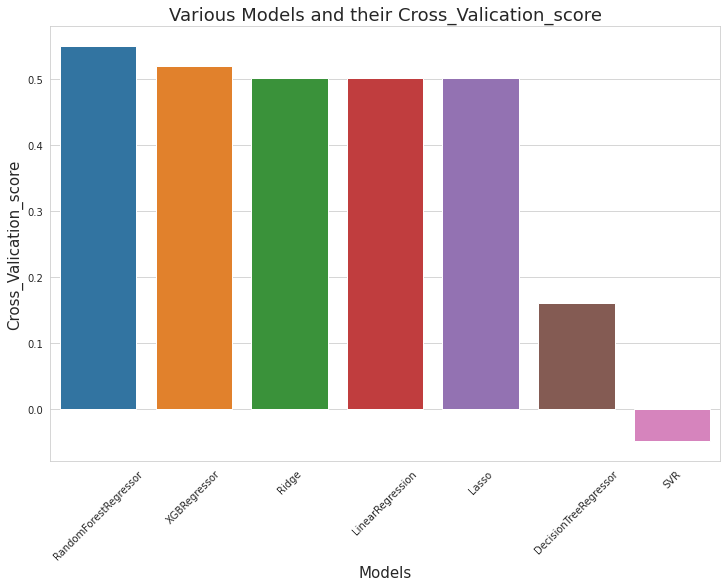

In [56]:
#Cross_Valication_score
sorted_keys = sorted(Cross_Valication_score_dict, key=Cross_Valication_score_dict.get, reverse=True)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax=sns.barplot(x=list(Cross_Valication_score_dict.keys()), y=list(Cross_Valication_score_dict.values()), order=sorted_keys)
plt.xticks(rotation=45)
plt.xlabel("Models",size=15)
plt.ylabel("Cross_Valication_score",size=15)
plt.title("Various Models and their Cross_Valication_score",size=18)

plt.show()

# Feature Engineering

In [57]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [58]:
# create a copy of the original DataFrame
df_fe = df.copy()

# create a new feature based on item type
df_fe['Item_Category'] = df_fe['Item_Type'].apply(lambda x: 'Food' if x in ['Dairy', 'Meat', 'Fruits', 'Vegetables', 'Snack Foods', 'Breads'] else 'Non-Food' if x in ['Household', 'Health and Hygiene', 'Frozen Foods', 'Canned', 'Baking Goods'] else 'Drinks')

# create a new feature based on item weight
df_fe['Item_Weight_Group'] = pd.cut(df_fe['Item_Weight'], bins=[0, 10, 20, 30], labels=['Lightweight', 'Medium-weight', 'Heavyweight'])

# create a new feature based on outlet establishment year
df_fe['Outlet_Age'] = 2023 - df_fe['Outlet_Establishment_Year']

# create a new feature based on item visibility
df_fe['Item_Visibility_Group'] = pd.cut(df_fe['Item_Visibility'], bins=[-1, 0.05, 0.15, 1], labels=['Low-visibility', 'Medium-visibility', 'High-visibility'])

# create a new feature based on item MRP
df_fe['Item_Price_Group'] = pd.cut(df_fe['Item_MRP'], bins=[0, 100, 200, 300], labels=[0, 1, 2])

# create a new feature based on outlet location type and outlet type
df_fe['Outlet_Type_Category'] = df_fe['Outlet_Location_Type'].astype(str) + '-' + df_fe['Outlet_Type'].astype(str)


In [59]:
df2=df1
df2["Outlet_Age"]=2023-df["Outlet_Establishment_Year"]
df2["Item_Price_Group"]=pd.cut(df2['Item_MRP'], bins=[0, 100, 200, 300], labels=[0, 1, 2])

In [60]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Price_Group
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,24,2
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,14,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,24,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,25,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,36,0


In [61]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Define the numerical columns in your data
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Standardize the numerical columns in your data
df2[num_cols] = scaler.fit_transform(df2[num_cols])

In [62]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Price_Group
0,156,-0.840601,0,-0.970732,4,1.747454,9,1999,1,0,1,3735.1380,24,2
1,8,-1.639173,1,-0.908111,14,-1.489023,3,2009,1,2,2,443.4228,14,0
2,662,1.096763,0,-0.956917,10,0.010040,9,1999,1,0,1,2097.2700,24,1
3,1121,1.498411,1,-1.281758,6,0.660050,0,1998,2,2,0,732.3800,25,1
4,1297,-0.928018,0,-1.281758,9,-1.399220,1,1987,0,2,1,994.7052,36,0


Without Creating any new Features and Standardization

In [63]:
X=df1[df1.columns.difference(["Item_Outlet_Sales"])]
y=df1["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
model=RandomForestRegressor()
model.fit(X_train, y_train)
r2_sales = metrics.r2_score(y_test, model.predict(X_test))
print('Before Feature Engineering R Squared value = ', r2_sales)

Before Feature Engineering R Squared value =  0.5593532094181806


After Creating New Features and Doing the Standardization

In [78]:
X=df2[df1.columns.difference(["Item_Outlet_Sales"])]
y=df2["Item_Outlet_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [76]:
X

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Price_Group,Item_Type,Item_Visibility,Item_Weight,Outlet_Age,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,156,1.747454,2,4,-0.970732,-0.840601,24,1999,9,0,1,1
1,1,8,-1.489023,0,14,-0.908111,-1.639173,14,2009,3,2,1,2
2,0,662,0.010040,1,10,-0.956917,1.096763,24,1999,9,0,1,1
3,1,1121,0.660050,1,6,-1.281758,1.498411,25,1998,0,2,2,0
4,0,1297,-1.399220,0,9,-1.281758,-0.928018,36,1987,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,370,1.180783,2,13,-0.181193,-1.415903,36,1987,1,2,0,1
8519,1,897,-0.527301,1,0,-0.371154,-1.057964,21,2002,7,1,2,1
8520,0,1357,-0.897208,0,8,-0.599784,-0.533458,19,2004,6,1,2,1
8521,1,681,-0.607977,1,13,1.532880,-1.334392,14,2009,3,2,1,2


In [80]:
model=RandomForestRegressor()
model.fit(X_train, Y_train)
r2_sales = metrics.r2_score(Y_test, model.predict(X_test))
print('After Feature Engineering R Squared value = ', r2_sales)

After Feature Engineering R Squared value =  0.5616250954195836


## Dimension Reduction (PCA)

In [97]:
df2.shape

(8523, 14)

In [129]:
from sklearn.decomposition import PCA

# create PCA object with desired number of components
n_components = 4
pca = PCA(n_components=n_components)

# fit PCA on the standardized numerical features
X_numerical = df2[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']]
pca.fit(X_numerical)

# transform the standardized numerical features using the fitted PCA model
X_pca = pca.transform(X_numerical)

# Get the variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance ratio
cumulative_variance_ratio = np.cumsum(variance_ratio)

# concatenate the transformed numerical features and the categorical features
df_pca = pd.DataFrame(np.concatenate((df2[['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Outlet_Establishment_Year',"Item_Outlet_Sales"]].values, X_pca), axis=1),
                      columns=['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Outlet_Establishment_Year',"Item_Outlet_Sales","PC1","PC2","PC3","PC4"])


# use X for modeling


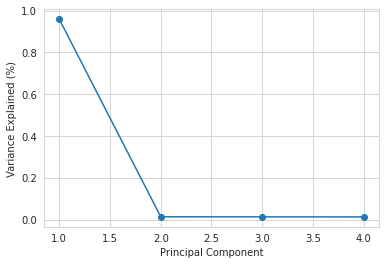

In [130]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.show()

In [99]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Price_Group
0,156,-0.840601,0,-0.970732,4,1.747454,9,1999,1,0,1,3735.1380,24,2
1,8,-1.639173,1,-0.908111,14,-1.489023,3,2009,1,2,2,443.4228,14,0
2,662,1.096763,0,-0.956917,10,0.010040,9,1999,1,0,1,2097.2700,24,1
3,1121,1.498411,1,-1.281758,6,0.660050,0,1998,2,2,0,732.3800,25,1
4,1297,-0.928018,0,-1.281758,9,-1.399220,1,1987,0,2,1,994.7052,36,0


In [131]:
df_pca.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Establishment_Year,Item_Outlet_Sales,PC1,PC2,PC3,PC4
0,0.0,156.0,4.0,9.0,0.0,1.0,1.0,1999.0,3735.1380,-1.178801,-0.805502,-0.050000,-2.006528
1,1.0,8.0,14.0,3.0,2.0,1.0,2.0,2009.0,443.4228,-11.176656,1.907929,-1.284253,-0.498806
2,0.0,662.0,10.0,9.0,0.0,1.0,1.0,1999.0,2097.2700,-1.175656,-1.040723,-0.908496,0.438839
3,1.0,1121.0,6.0,0.0,2.0,2.0,0.0,1998.0,732.3800,-0.178632,-1.839248,-0.946890,0.201815
4,0.0,1297.0,9.0,1.0,2.0,0.0,1.0,1987.0,994.7052,10.819702,1.197130,-1.793228,-0.276648


## Feature Selection

### Lasso Regression

In [133]:
X=df_pca[df_pca.columns.difference(["Item_Outlet_Sales"])]
y=df_pca["Item_Outlet_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [137]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Create Lasso model with alpha = 0.001
lasso = Lasso(alpha=0.001)

# Fit the model
lasso.fit(X_train, y_train)

# Select features using Lasso and fit the model
model = SelectFromModel(lasso, prefit=True)
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)

# Print selected features
selected_features = X_train.columns[model.get_support()]
print(selected_features)


Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'PC1', 'PC2',
       'PC3', 'PC4'],
      dtype='object')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.799e+07, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [138]:
coef = pd.Series(lasso.coef_, index=X_train.columns)
dropped_features = coef[coef==0].index.tolist()
print("Dropped features:", dropped_features)

Dropped features: []


In [139]:
X=df_pca[df_pca.columns.difference(["Item_Outlet_Sales"])]
y=df2["Item_Outlet_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [140]:
X_train

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,PC1,PC2,PC3,PC4
5374,1.0,989.0,10.0,1998.0,0.0,2.0,2.0,0.0,-0.127033,1.169071,3.118941,3.358045
998,0.0,97.0,4.0,2004.0,6.0,1.0,2.0,1.0,-6.172110,-2.200474,-0.020996,0.275304
7171,1.0,1233.0,0.0,1985.0,5.0,2.0,1.0,3.0,12.830924,-0.407770,0.249568,-0.603044
1698,0.0,682.0,0.0,2002.0,7.0,1.0,2.0,1.0,-4.167558,0.422627,-0.328667,0.569287
2774,0.0,1350.0,9.0,2002.0,7.0,1.0,2.0,1.0,-4.172798,-0.226279,-0.783742,0.500436
...,...,...,...,...,...,...,...,...,...,...,...,...
8499,0.0,1373.0,8.0,2004.0,6.0,1.0,2.0,1.0,-6.172795,0.502118,-0.719178,0.032837
2064,0.0,423.0,3.0,2009.0,3.0,2.0,1.0,2.0,-11.177428,1.173531,-1.061108,-0.720678
7985,0.0,1533.0,8.0,1987.0,1.0,2.0,0.0,1.0,10.834703,0.511684,0.396333,-0.427804
2303,0.0,1065.0,1.0,1997.0,8.0,0.0,2.0,1.0,0.828007,-0.995208,0.218784,-0.818934


In [141]:
model=RandomForestRegressor()
model.fit(X_train, Y_train)
r2_sales = metrics.r2_score(Y_test, model.predict(X_test))
print('After Feature Engineering R Squared value = ', r2_sales)

After Feature Engineering R Squared value =  0.5733188459080558


In [147]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Separate the target variable and the features
target = df_pca['Item_Outlet_Sales']
features = df_pca.drop('Item_Outlet_Sales', axis=1)

# Create a random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the cross-validation method
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply recursive feature elimination with cross-validation
rfe = RFECV(estimator=rf, cv=cv, scoring='r2')
rfe.fit(features, target)

# Print the selected features
print("Selected Features: ", features.columns[rfe.support_].tolist())

Selected Features:  ['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Establishment_Year', 'PC1', 'PC2', 'PC3', 'PC4']


Using Corelation Coefficient

In [144]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df_pca.corr()

# Drop the features that are not highly correlated with the target variable
correlation_threshold = 0.1
low_correlation_features = []
for feature in correlation_matrix.columns:
    if abs(correlation_matrix[feature]['Item_Outlet_Sales']) < correlation_threshold:
        low_correlation_features.append(feature)
print("Low Corelated Features",low_correlation_features)
data = df_pca.drop(low_correlation_features, axis=1)


Low Corelated Features ['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year', 'PC1']


In [145]:
data

,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,PC2,PC3,PC4
0,9.0,1.0,1.0,3735.1380,-0.805502,-0.050000,-2.006528
1,3.0,1.0,2.0,443.4228,1.907929,-1.284253,-0.498806
2,9.0,1.0,1.0,2097.2700,-1.040723,-0.908496,0.438839
3,0.0,2.0,0.0,732.3800,-1.839248,-0.946890,0.201815
4,1.0,0.0,1.0,994.7052,1.197130,-1.793228,-0.276648
...,...,...,...,...,...,...,...
8518,1.0,0.0,1.0,2778.3834,0.160137,0.350313,-1.837258
8519,7.0,2.0,1.0,549.2850,1.000640,-0.470125,-0.529064
8520,6.0,2.0,1.0,1193.1136,0.812559,-0.851570,-0.001428
8521,3.0,1.0,2.0,1845.5976,1.781822,1.274192,0.016509


In [73]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.metrics import r2_score
import pandas as pd

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create random forest model
rf = RandomForestRegressor(random_state=42)

# fit model on all features
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_all = r2_score(y_test, y_pred)

# feature selection using Lasso regression
lasso = SelectFromModel(Lasso(alpha=0.05, random_state=42))
lasso.fit(X_train, y_train)
X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)
rf.fit(X_train_lasso, y_train)
y_pred_lasso = rf.predict(X_test_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# feature selection using correlation
corr_features = X.corrwith(y).sort_values(ascending=False).index[:5]
X_train_corr = X_train[corr_features]
X_test_corr = X_test[corr_features]
rf.fit(X_train_corr, y_train)
y_pred_corr = rf.predict(X_test_corr)
r2_corr = r2_score(y_test, y_pred_corr)

# feature selection using k-best
k_best = SelectKBest(score_func=f_regression, k=5)
k_best.fit(X_train, y_train)
X_train_k_best = k_best.transform(X_train)
X_test_k_best = k_best.transform(X_test)
rf.fit(X_train_k_best, y_train)
y_pred_k_best = rf.predict(X_test_k_best)
r2_k_best = r2_score(y_test, y_pred_k_best)

# print R2 scores for all features and selected features
print('R2 score using all features:', r2_all)
print('R2 score using Lasso regression:', r2_lasso)
print('R2 score using correlation:', r2_corr)
print('R2 score using k-best:', r2_k_best)


R2 score using all features: 0.5580275044116242
R2 score using Lasso regression: 0.5580275044116242
R2 score using correlation: 0.4524322041992216
R2 score using k-best: 0.4521486397723352


In [149]:
X_train

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,PC1,PC2,PC3,PC4
5374,1.0,989.0,10.0,1998.0,0.0,2.0,2.0,0.0,-0.127033,1.169071,3.118941,3.358045
998,0.0,97.0,4.0,2004.0,6.0,1.0,2.0,1.0,-6.172110,-2.200474,-0.020996,0.275304
7171,1.0,1233.0,0.0,1985.0,5.0,2.0,1.0,3.0,12.830924,-0.407770,0.249568,-0.603044
1698,0.0,682.0,0.0,2002.0,7.0,1.0,2.0,1.0,-4.167558,0.422627,-0.328667,0.569287
2774,0.0,1350.0,9.0,2002.0,7.0,1.0,2.0,1.0,-4.172798,-0.226279,-0.783742,0.500436
...,...,...,...,...,...,...,...,...,...,...,...,...
8499,0.0,1373.0,8.0,2004.0,6.0,1.0,2.0,1.0,-6.172795,0.502118,-0.719178,0.032837
2064,0.0,423.0,3.0,2009.0,3.0,2.0,1.0,2.0,-11.177428,1.173531,-1.061108,-0.720678
7985,0.0,1533.0,8.0,1987.0,1.0,2.0,0.0,1.0,10.834703,0.511684,0.396333,-0.427804
2303,0.0,1065.0,1.0,1997.0,8.0,0.0,2.0,1.0,0.828007,-0.995208,0.218784,-0.818934


# Hyper Parameter Tuning 

In [154]:
target = df_pca['Item_Outlet_Sales']
features = df_pca.drop('Item_Outlet_Sales', axis=1)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {'n_estimators': randint(100, 1000),
              'max_depth': randint(3, 10)}

# Create a random forest regressor
rf = RandomForestRegressor()

# Create a Random Search object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, scoring='r2', n_iter=10)

# Fit the Random Search object to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', random_search.best_params_)
print('Best Score:', random_search.best_score_)


Best Parameters: {'max_depth': 7, 'n_estimators': 862}
Best Score: 0.581254151792439


In [159]:
# Initialize the Random Forest Regressor with the best hyperparameters
rf_model = RandomForestRegressor(max_depth=7, n_estimators=862)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate the r2 score on the test data
r2 = r2_score(y_test, y_pred)
print("r2 Score: ", r2)

r2 Score:  0.5926014102453375


# Dimension Reduction

In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Fat_Content      8523 non-null   int64   
 1   Item_Identifier       8523 non-null   int64   
 2   Item_MRP              8523 non-null   float64 
 3   Item_Price_Group      8523 non-null   category
 4   Item_Type             8523 non-null   int64   
 5   Item_Visibility       8523 non-null   float64 
 6   Item_Weight           8523 non-null   float64 
 7   Outlet_Age            8523 non-null   int64   
 8   Outlet_Identifier     8523 non-null   int64   
 9   Outlet_Location_Type  8523 non-null   int64   
 10  Outlet_Size           8523 non-null   int64   
 11  Outlet_Type           8523 non-null   int64   
dtypes: category(1), float64(3), int64(8)
memory usage: 741.0 KB


# Modelling

Approach towards the problem is to do data clustering first and use data models accordingly

# Model Evaluation